# Data Science Salary Prediction

A salary prediction model is crucial for HR and business-related decisions, making significant contributions to the overall success and growth of an organization. It offers several benefits to businesses, including:
- Facilitating the recruitment and hiring process by ensuring that candidates receive competitive and fair salary offers.
- Supporting employee retention efforts by ensuring that salaries fall within the market range, therefore increasing employee satisfaction and reducing turnover.
- Assisting with budget planning by providing insights into projected salary expenses, allowing businesses to allocate resources effectively. 

This Machine Learning pipeline is implemented to predict the salary for a job in the data science field based on the following features:

- work_year: The year the recorded salary was paid.
- experience_level: The experience level of the employee during the year (Entry-Level, Senior, ..etc.)
- employment_type: The type of employment for the role (Full-Time, Part-Time,...etc.)
- job_title: The role worked in during the year.
- employee_residence: Employee's primary country of residence during the work year.
- remote_ratio: The overall amount of work done remotely.
- company_location: The country of the employer's main office or branch.
- company_size: Whether the comapny is a small, medium or large sized comapny.

In this pipeline, all data preprocessing and feature engineering techniques needed will be implemented to train a model thats achieves the lowest error in prediction possible.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

 ------------------------------------------------------------------------------------                                        

# Load Data

- Loaded the `ds_salaries` dataset using Pandas. The dataset can be found at https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
- Created a non-pointer copy of the dataset to preserve the original one.
- Split dataset into Train (80%) and Test (20%) before data exploration to avoid data leakage.

In [2]:
#Loading dataset
df_og=pd.read_csv("E:\\Documents\\Masters\\Machine Learning 2\\DataScience_salaries\\ds_salaries.csv")

In [3]:
#Creating a non-pointer copy of the dataset
df = df_og.copy()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
#Shape of the whole dataset
print("The dimensions of the whole dataset: ", df.shape)

The dimensions of the whole dataset:  (3755, 11)


In [5]:
#Split the dataset into 80:20 train:test
train_df, test_df = train_test_split(df ,test_size=0.2, shuffle=True) 
train_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
743,2023,SE,FT,Data Scientist,105000,USD,105000,US,0,US,M
3271,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
2128,2022,EN,FL,Data Analytics Consultant,50000,USD,50000,BE,100,US,S
985,2023,EN,FT,AI Developer,60000,EUR,64385,DE,0,DE,M
2191,2022,SE,FT,Machine Learning Engineer,110000,EUR,115573,FR,100,FR,M
...,...,...,...,...,...,...,...,...,...,...,...
2420,2022,MI,FT,Data Engineer,90000,USD,90000,US,100,US,M
962,2023,SE,FT,Research Scientist,200000,USD,200000,US,0,US,M
3435,2022,MI,FT,Data Analyst,20000,USD,20000,GR,100,GR,S
1034,2023,EX,FT,Head of Data Science,131899,GBP,160288,GB,0,GB,M


 ------------------------------------------------------------------------------------                                        

# Data Exploration
 
- Checked the shape, datatypes and non-null count of the train dataset.
- Identified unique values of each feature.
- Checked for implicit and explicit missing values (None were found).
- Checked distrbution of the target value (`salary_in_usd`)
- Identified outliers in `salary_in_usd` in the train dataset
- Visualized the relationship between `experience_level` and `salary_in_usd`
- Visualized the relationship between `company_size` and `salary_in_usd`

In [7]:
#Printing Information on the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 743 to 2643
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3004 non-null   int64 
 1   experience_level    3004 non-null   object
 2   employment_type     3004 non-null   object
 3   job_title           3004 non-null   object
 4   salary              3004 non-null   int64 
 5   salary_currency     3004 non-null   object
 6   salary_in_usd       3004 non-null   int64 
 7   employee_residence  3004 non-null   object
 8   remote_ratio        3004 non-null   int64 
 9   company_location    3004 non-null   object
 10  company_size        3004 non-null   object
dtypes: int64(4), object(7)
memory usage: 281.6+ KB


In [8]:
#Checking unique values for each feature
train_df.nunique()

work_year               4
experience_level        4
employment_type         4
job_title              89
salary                736
salary_currency        18
salary_in_usd         915
employee_residence     74
remote_ratio            3
company_location       66
company_size            3
dtype: int64

In [9]:
#Checking for null values
train_df.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

<Axes: >

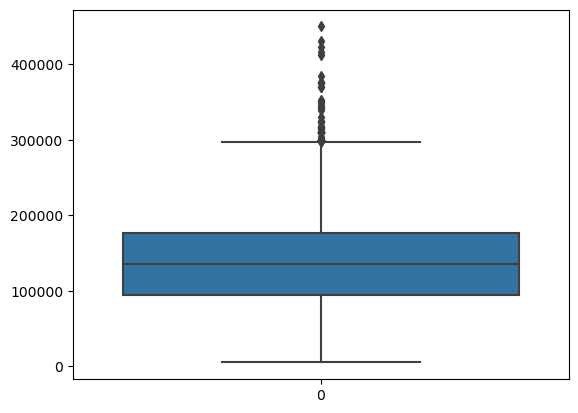

In [10]:
#Check the salary_in_usd distribution
sns.boxplot(train_df['salary_in_usd'])

As seen from the boxplot salaries approximately more than 300,000$ are identified as outliers.

In [11]:
#Calculate number of outliers
sum(train_df['salary_in_usd']>300000)

38

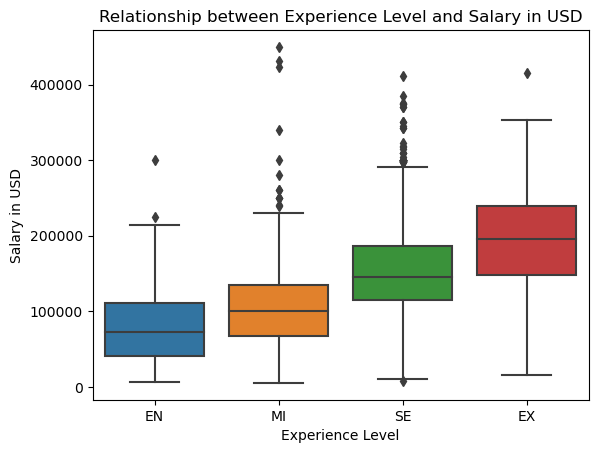

In [12]:
#Plot the relationship between Experience Level and Salary in USD
sns.boxplot(x=train_df['experience_level'], y=train_df['salary_in_usd'], order=['EN', 'MI', 'SE', 'EX'])
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Relationship between Experience Level and Salary in USD')
plt.show()

As seen from the boxplot as `experience_level` moves from Entry-Level to Executive, the `salary_in_usd` range increases.

In [13]:
#Check the experience_level distribution
print(train_df['experience_level'].value_counts())

SE    1998
MI     652
EN     255
EX      99
Name: experience_level, dtype: int64


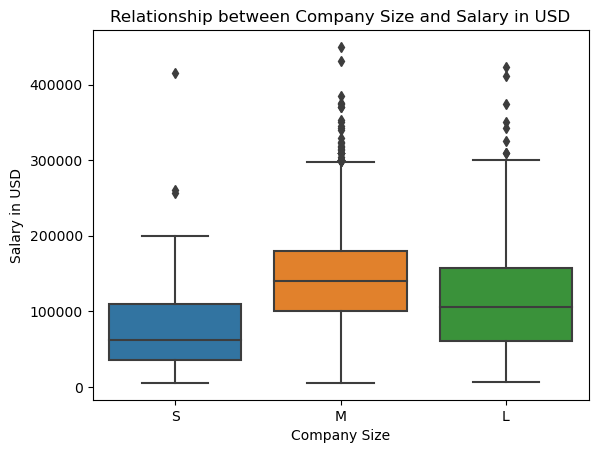

In [14]:
#Plot the relationship between Company Size and Salary in USD
sns.boxplot(x=train_df['company_size'], y=train_df['salary_in_usd'], order=['S', 'M', 'L'])
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.title('Relationship between Company Size and Salary in USD')
plt.show()

As seen from the graph (BoxPlot) as the `company_size` increases from S to L, the `salary_in_usd` increases. Although with M-Sized and L-Sized companies the difference is insignificant.

In [15]:
#Check the comapny_size distribution
print(train_df['company_size'].value_counts())

M    2526
L     358
S     120
Name: company_size, dtype: int64


- The training dataset consists of 11 columns (Features) and 3004 rows (Data points).
- After plotting the `salary_in_usd` distribution (BoxPlot), 38 outlier were identified.
- The features `salary_in_usd` and `experience_level` has a strong Linear Realtionship.
- More than 50% of the train set has `experience_level` = Senior
- The features `salary_in_usd` and `company_size` has a Linear realtionship.
- More than 75% of the train set's ` company_size` = Medium
- The imbalance in the features, `experience_level` and ` company_size` might affect the predictor's performance.

 ------------------------------------------------------------------------------------                                        

# Data Preprocessing 

- Dropped columns `salary` and `salary_curreny` as we will be predicting the `salary_in_usd` for uniformity.
- Removed the `salary_in_usd` outlier identified from the train dataset since they were only 38 records.
    - Keeping them was also tested, however it negatively affected the model performance.
    - Tried removing other outliers such as job type (Full-time/Part-time), however it only affected the performance negatively therefore, it wasn't implemented.
- Split the train and test dataset into Features and Target (`salary_in_usd`)

In [16]:
#Drop Columns Salary and salary_currency as we will be using the salary_in_usd
train_df=train_df.drop(['salary', 'salary_currency'], axis=1)

In [17]:
#Remove Outlier
train_df=train_df.loc[df['salary_in_usd']<300000]
train_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
743,2023,SE,FT,Data Scientist,105000,US,0,US,M
3271,2022,SE,FT,Data Scientist,123000,US,100,US,M
2128,2022,EN,FL,Data Analytics Consultant,50000,BE,100,US,S
985,2023,EN,FT,AI Developer,64385,DE,0,DE,M
2191,2022,SE,FT,Machine Learning Engineer,115573,FR,100,FR,M
...,...,...,...,...,...,...,...,...,...
2420,2022,MI,FT,Data Engineer,90000,US,100,US,M
962,2023,SE,FT,Research Scientist,200000,US,0,US,M
3435,2022,MI,FT,Data Analyst,20000,GR,100,GR,S
1034,2023,EX,FT,Head of Data Science,160288,GB,0,GB,M


The Training dataset now has 2955 rows (Records) and 9 columns (Features)

In [18]:
#Splitting train dataset to features(x) and Target(y)
x_train=train_df.drop(['salary_in_usd'], axis=1)
y_train=train_df['salary_in_usd']

#Splitting train dataset to features(x) and Target(y)
x_test=test_df.drop(['salary_in_usd'], axis=1)
y_test=test_df['salary_in_usd']

 ------------------------------------------------------------------------------------                                        

# Feature Engineering

**Feature Encoding and Scaling**

- Transformed the following using ColumnTransformer:

    - The following categorical features were encoded using **OneHotEncoder**:
        - `work_year`
            - Since there were only 4 work years (2020,2021,2022 and 2023), it was better to encode it as a categorical feature                 and not numerical.
        - `employment_type`
        - `job_title`
        - `employee_residence`
        - `company_location`
        
    - The following categorical features were encoded using **OrdinalEncoder** as they have natural ordering and can be ranked:
       - `experience_level`
       - `company_size`
       
    - The following numerical feature was scaled using **StandardScaler**:
        - `remote_ratio`

In [19]:
#Getting a list of the categorical features
cat_cols = train_df.select_dtypes(include=['object']).columns
cat_cols

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [20]:
#Ordering the experience_level feature from entry-level to executive
ex_level_categories = [['EN', 'MI', 'SE', 'EX']] 
#Ordering the company_size feature from S to L
comp_size_categories = [['S', 'M', 'L']]


# Create the ColumnTransformer
transformer = ColumnTransformer([
    ('OrdinalEncoder', OrdinalEncoder(categories=ex_level_categories, handle_unknown='use_encoded_value', unknown_value=-1), ['experience_level']),
    ('OrdinalEncoder2', OrdinalEncoder(categories=comp_size_categories, handle_unknown='use_encoded_value', unknown_value=-1), ['company_size']),
    ('OnehotEncoder', OneHotEncoder(handle_unknown='ignore'), ['work_year','employment_type', 'job_title', 'employee_residence', 'company_location']),
    ('Scaled', StandardScaler(), ['remote_ratio'])
])

#Fitting the transformer to the x_train data
transformer.fit(x_train)

# Apply the transformation to the x_train data
x_train_enc = transformer.transform(x_train)
## Apply the transformation to the x_test data
x_test_enc= transformer.transform(x_test)

print("\n Train data shape after Encoding and Scaling of features: ", x_train_enc.shape)
print("\n Test data shape after Encoding and Scaling of features: ", x_test_enc.shape)


 Train data shape after Encoding and Scaling of features:  (2955, 239)

 Test data shape after Encoding and Scaling of features:  (751, 239)


**Dimensionality Reduction**

- Plotted the PCA graph in order to choose the most suitable n-components
- Chose n=50 to balance between reducing dimensionality and keeping important features.
- Applied PCA to data
- Converted data to pandas df again in order to match the y_train and y_test datatype

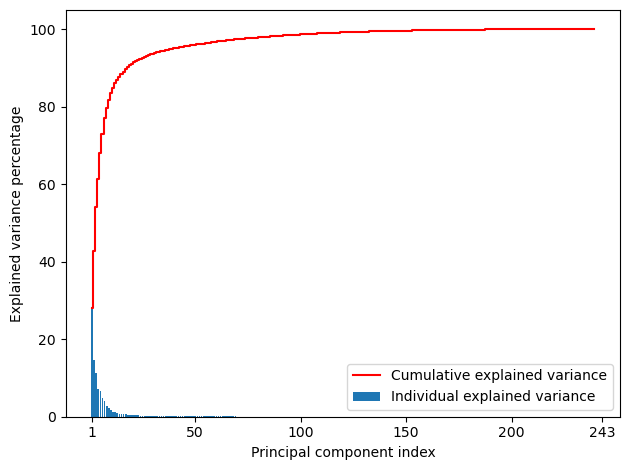

In [22]:
#Initialize PCA
pca = PCA(n_components=None)
#Fit PCA to x_train data
pca.fit(x_train_enc.toarray())

#Calculating cumulative explained variance ratio
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

#Plotting the individual explained variance
plt.bar(range(1, 240), exp_var, align='center',
        label='Individual explained variance')

#Plotting the cumulative explained variance
plt.step(range(1,240), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1,50,100,150,200,243])
plt.legend(loc='best')
plt.tight_layout()

After analyzing the graph and prioritizing finding the best balance between reducing dimensionality and keeping important features, the n-components were chosen to be 50.
- Note that n_components= 25 and n_components= 65 were tested and they both negatively affected the model performance.

In [23]:
#Initialize PCA with 50 components
pca= PCA (n_components = 50)
#Fit PCA to train data
pca.fit(x_train_enc.toarray())

PCA(n_components=50)

In [24]:
#Apply fitted PCA to x_train and x_test data
x_train_pca = pca.transform(x_train_enc.toarray())
x_test_pca = pca.transform(x_test_enc.toarray())
print("x_train shape:", x_train_pca.shape)
print("x_test shape:", x_test_pca.shape)

x_train shape: (2955, 50)
x_test shape: (751, 50)


In [25]:
#Converting the data to a pandas dataframe once again
column_names = ['PC' + str(i+1) for i in range(x_train_pca.shape[1])]
x_train= pd.DataFrame(x_train_pca, columns=column_names)
x_test= pd.DataFrame(x_test_pca, columns=column_names)
print("\n The final dataset that will be used to apply the model \n")
x_train


 The final dataset that will be used to apply the model 



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-1.114987,-0.376418,0.362262,0.283268,-0.628566,-0.522789,0.131345,-0.160965,-0.029274,0.032610,...,-0.003642,-0.000834,-0.000557,0.002920,-0.003123,0.001684,0.001591,-0.002910,0.002526,-0.001350
1,1.202634,-0.544128,-0.524611,0.123760,-0.645502,-0.448933,0.186263,-0.134605,0.015655,0.032016,...,0.000254,-0.001340,-0.002212,0.001263,0.003259,0.000395,0.000927,0.000835,-0.000937,-0.001484
2,1.417071,1.423702,-0.120629,-0.647160,-0.140587,0.140662,1.169822,0.392230,-0.142251,-0.146269,...,-0.261953,0.072617,0.336862,-0.265354,0.218906,0.240810,0.165788,-0.223270,-0.190081,-0.506958
3,-0.816365,2.008584,0.764740,0.132023,0.088753,-0.024763,0.208814,0.205490,-0.071540,-0.403982,...,-0.051957,0.065649,-0.076322,-0.018372,0.092338,0.090947,-0.051870,-0.017533,0.067469,-0.116968
4,1.321354,0.201895,-0.454796,1.007763,0.221883,0.395353,0.108073,0.743746,0.229724,-0.400761,...,-0.020560,0.030905,0.005172,-0.002642,0.026425,0.008234,-0.016257,0.017480,0.020064,0.031842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,1.235851,0.201636,-0.407889,-0.845897,0.550574,-0.258356,0.169314,-0.066375,0.034815,-0.068949,...,0.005180,-0.004455,0.000807,-0.004509,0.003697,-0.003753,-0.000171,-0.000604,-0.000027,-0.000659
2951,-1.149614,-0.354704,0.402686,0.075678,-0.115840,0.100775,-0.038375,0.269031,0.007418,-0.029938,...,0.002917,0.003884,-0.001720,-0.002768,-0.001781,-0.011264,-0.001339,-0.001059,-0.005374,-0.003292
2952,1.380425,0.963264,-0.247834,0.262934,-0.042911,1.040681,1.073810,-0.246988,-0.264492,-0.217393,...,0.010284,-0.001860,0.018465,-0.011273,-0.010486,0.003611,0.039756,0.021219,0.008581,-0.039737
2953,-1.080307,-0.311792,0.253723,1.891516,0.527089,0.433262,0.150322,-0.117175,0.708879,0.721725,...,-0.035624,-0.045323,-0.065152,-0.059646,0.119773,-0.024644,-0.037584,0.032971,0.050536,-0.040671


 ------------------------------------------------------------------------------------                                        

# Model Selection and Hyperparameter Tuning

- Conducted HyperParameter tuning on 5 different regression algorithms and then trained them using the best parameters. The algorithms are: 
    - Linear Regression
    - Random Forests
    - Gradient Boosting
    - XGBoost
    - LightGBM
  
- Used 5-fold cross validation (CV=5) to balance between computational efficiency and reliable estimation.
    
- Chose the scoring criteria to be mean squared error (MSE) as it gives more weight to larger errors compared to mean absolute error and since this model predicts salaries, a big difference between estimation and actual defies the purpose of the model. Therefore, it's important to penalize larger errors.

**Linear Regression**

In [41]:
# Create the parameter grid 
lr_param_grid = {
    'fit_intercept': [True, False],
}

# Create a linear regression model
lr = LinearRegression()

# Instantiate the grid search model
lr_grid_search = GridSearchCV(estimator = lr, param_grid = lr_param_grid, scoring= 'neg_mean_squared_error',
                          cv = 5, n_jobs = -1, verbose = 2)

In [42]:
# Fit the grid search to the train data
lr_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=2)

In [43]:
#Identify the Best parameters
print("The best parameters for linear regression model are:  \n" ,lr_grid_search.best_params_)

The best parameters for linear regression model are:  
 {'fit_intercept': True}


In [68]:
#Caluclate the Mean Absolute Error (MAE) of best parameter
lr_perf =lr_grid_search.best_score_
print("MSE score of training dataset with tuning is : {:.2f}".format(lr_perf))

MSE score of training dataset with tuning is : -1951756429.50


**Random Forest**

In [45]:
# Create the parameter grid 
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 8, 10],
    'max_features': ['sqrt', 'log2'],
}

# Create a random forests model
rf = RandomForestRegressor()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, scoring= 'neg_mean_squared_error',
                          cv = 5, n_jobs = -1, verbose = 2)

In [46]:
# Fit the grid search to the data
rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
#Identify the Best parameters
print("The best parameters for random forests model are:  \n" ,rf_grid_search.best_params_)

The best parameters for random forests model are:  
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [69]:
#Caluclate the Mean Absolute Error (MAE) of best parameter
rf_perf =rf_grid_search.best_score_
print("MSE score of training dataset with tuning is : {:.2f}".format(rf_perf))

MSE score of training dataset with tuning is : -1901315319.02


**Gradient Boosting**

In [49]:
# Create the parameter grid 
gb_param_grid = {
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Create a Gradient Boosting model
gb = GradientBoostingRegressor()

# Instantiate the grid search model
gb_grid_search = GridSearchCV(estimator = gb, param_grid = gb_param_grid, scoring= 'neg_mean_squared_error',
                          cv = 5, n_jobs = -1, verbose = 2)

In [50]:
# Fit the grid search to the data
gb_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
#Identify the Best parameters
print("The best parameters for gradient boosting model are:  \n" ,gb_grid_search.best_params_)

The best parameters for gradient boosting model are:  
 {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


In [70]:
#Caluclate the Mean Absolute Error (MAE) of best parameter
gb_perf =gb_grid_search.best_score_
print("MSE score of training dataset with tuning is : {:.2f}".format(gb_perf) )

MSE score of training dataset with tuning is : -1882410959.64


**XGBoost**

In [53]:
# Create the parameter grid 
xg_param_grid = {
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a XGBoost model
xg = XGBRegressor()

# Instantiate the grid search model
xg_grid_search = GridSearchCV(estimator = xg, param_grid = xg_param_grid, scoring= 'neg_mean_squared_error',
                          cv = 5, n_jobs = -1, verbose = 2)

In [54]:
# Fit the grid search to the data
xg_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [55]:
#Identify the Best parameters
print("The best parameters for XGboost model are:  \n" ,xg_grid_search.best_params_)

The best parameters for XGboost model are:  
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [71]:
#Caluclate the Mean Absolute Error (MAE) of best parameter
xg_perf =xg_grid_search.best_score_
print("MSE score of training dataset with tuning is : {:.2f}".format(xg_perf))

MSE score of training dataset with tuning is : -1886605183.11


**LightGBM**

In [57]:
# Create the parameter grid 
lgb_param_grid = {
    'max_depth': [4,6,8,10,15],
    'learning_rate': [0.01,0.05,0.1],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a LightGBM model
lgb = LGBMRegressor()

# Instantiate the grid search model
lgb_grid_search = GridSearchCV(estimator = lgb, param_grid = lgb_param_grid, scoring= 'neg_mean_squared_error',
                          cv = 5, n_jobs = -1, verbose = 2)

In [58]:
# Fit the grid search to the data
lgb_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8, 10, 15],
                         'num_leaves': [31, 50, 100], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
#Identify the Best parameters
print("The best parameters for lightGBM model are: \n" , lgb_grid_search.best_params_)

The best parameters for lightGBM model are: 
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'num_leaves': 31, 'subsample': 0.8}


In [72]:
#Caluclate the Mean Absolute Error (MAE) of best parameter
lgb_perf =lgb_grid_search.best_score_
print("MSE score of training dataset with tuning is : {:.2f}".format(lgb_perf) )

MSE score of training dataset with tuning is : -1874866135.73


**Comparison and Model Selection**

In [74]:
print("MSE score of training dataset using Linear Regression : {:.2f}".format(lr_perf))
print("MSE score of training dataset using Random Forests : {:.2f}".format(rf_perf))
print("MSE score of training dataset using Gradient Boosting : {:.2f}".format(gb_perf))
print("MSE score of training dataset using XGBoost : {:.2f}".format(xg_perf))
print("MSE score of training dataset using LightGBM : {:.2f}".format(lgb_perf) )

MSE score of training dataset using Linear Regression : -1951756429.50
MSE score of training dataset using Random Forests : -1901315319.02
MSE score of training dataset using Gradient Boosting : -1882410959.64
MSE score of training dataset using XGBoost : -1886605183.11
MSE score of training dataset using LightGBM : -1874866135.73


Based on the Mean squared error score of the model, the chosen model is **LightGBM** as it has the lowest mean squared error, meaning it has the least difference between actual and predicted numbers

 ------------------------------------------------------------------------------------                                        

# Model Evaluation

In [79]:
#Predict Salaries for the the test data using LightGBM
y_pred = lgb_grid_search.predict(x_test) 

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Mean Absolute Error', 'Mean Absolute Percentage Error','Mean Squared Error',
                                   'Root Mean Squared Error', 'R-Squared Score'])

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

new_row = {
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-Squared Score': r2
    }

#Print evaluation metrics dataframe
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)
print("The Evaluation Metrics for Salary Predictions using LightGBM Model: ")
metrics_df

The Evaluation Metrics for Salary Predictions using LightGBM Model: 


,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,R-Squared Score
0,32837.153699,0.328267,2.058980e+09,45375.985855,0.436149


- The average percentage difference between the predicted values and the actual values is 32.8%
- So, the average difference between the actual salary and predicted salary is 32,837$

 ------------------------------------------------------------------------------------                                        

# Conclusion

- Following the completion of data cleaning, categorical feature encoding, numerical feature standardization, data dimensionality reduction, and model hyperparameter tuning, the performance of the salary prediction model showed improvement. 

- However, the average difference between the actual salary and the predicted is still notable as currently the dataset is predominantly composed of senior-level positions, which possess a broader salary range.

- For future recommendations:
    - Add more records of different experience level, job type and company size to the dataset in order to enhance the model's capacity to make accurate salary predictions across different job levels.
    - Try implementing ANN which can capture complex relationships and patterns in the data, however more data will be needed.
    - Add Education level as a feature as having a MSc., MBA or PHD can influence the salary.